In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("shopping_trends_updated.csv")

In [8]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [10]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [14]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [18]:
 data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

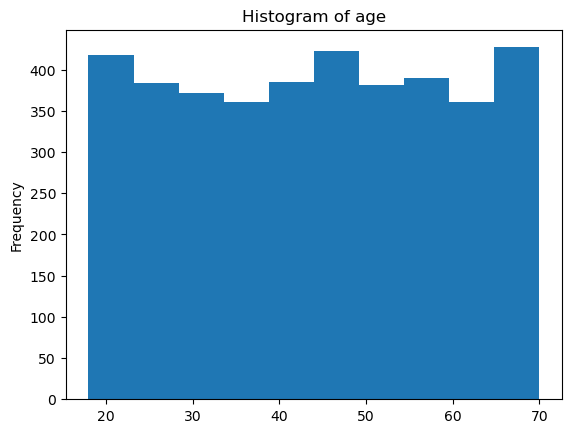

In [20]:
data["Age"].plot(kind = "hist")
plt.title("Histogram of age")
plt.show()

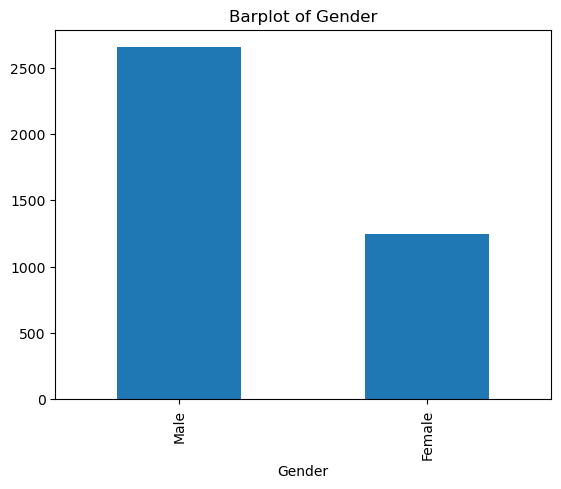

In [22]:
data["Gender"].value_counts().plot(kind = "bar")
plt.title("Barplot of Gender")
plt.show()

In [24]:
data.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending=False).head()

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [26]:
data.sort_values("Review Rating", ascending= False, inplace = True)

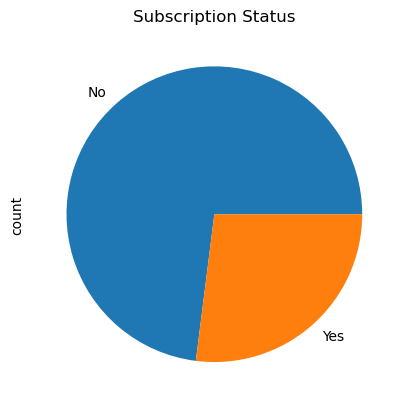

In [28]:
data["Subscription Status"].value_counts().plot(kind = "pie")
plt.title("Subscription Status")
plt.show()

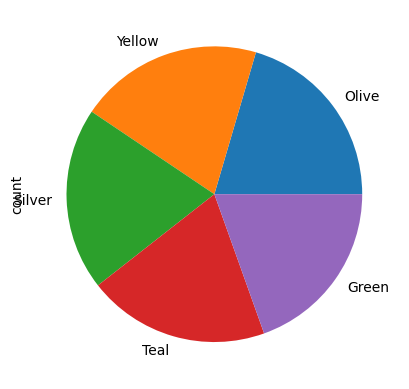

In [30]:
data["Color"].value_counts().head().plot(kind = "pie")
plt.show()

In [32]:
data.groupby("Season")["Purchase Amount (USD)"].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

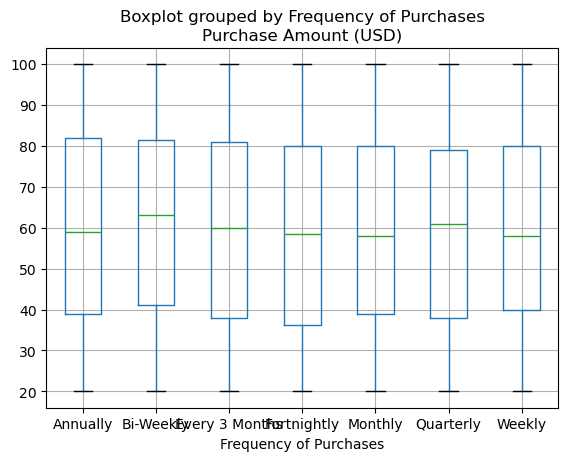

In [38]:
data.boxplot(column = "Purchase Amount (USD)", by = "Frequency of Purchases")
plt.show()

In [44]:
data["Payment Method"].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [48]:
pd.pivot_table(data, values = "Purchase Amount (USD)", index = "Location", columns = "Item Purchased", aggfunc = "mean")

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.500000,52.0,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.2,54.333333,49.000000,68.666667,79.500000,93.50,62.666667,40.500000,52.50
Alaska,74.6,76.750000,67.5,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.5,80.000000,76.666667,87.333333,73.333333,74.25,83.000000,50.333333,56.75
Arizona,48.6,84.500000,61.0,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.0,87.000000,46.000000,68.500000,78.500000,61.00,66.000000,70.400000,62.00
Arkansas,90.0,55.000000,66.0,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.0,59.500000,95.000000,44.500000,69.000000,60.50,56.000000,71.500000,52.00
California,57.4,61.666667,39.5,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.8,NaN,63.333333,56.000000,73.000000,83.00,69.400000,42.000000,69.00


In [52]:
data.groupby("Size")["Purchase Amount (USD)"].mean()

Size
L     58.563153
M     59.924217
S     61.037707
XL    60.090909
Name: Purchase Amount (USD), dtype: float64

In [54]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum()

Payment Method
Bank Transfer    36544
Cash             40002
Credit Card      40310
Debit Card       38742
PayPal           40109
Venmo            37374
Name: Purchase Amount (USD), dtype: int64

In [56]:
data.groupby("Discount Applied")["Review Rating"].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

In [58]:
data.groupby("Season")["Review Rating"].mean()    

Season
Fall      3.729949
Spring    3.790591
Summer    3.725654
Winter    3.752111
Name: Review Rating, dtype: float64

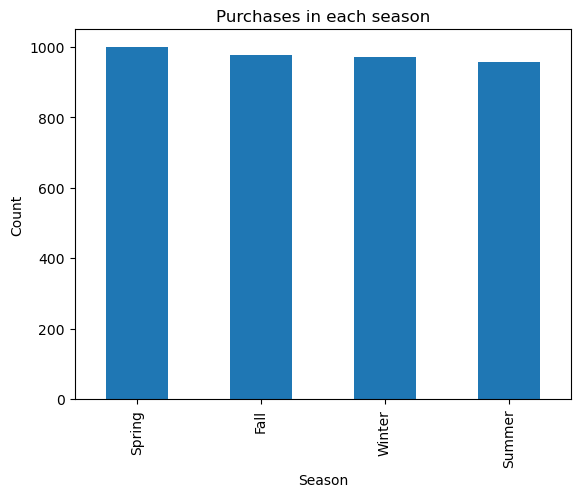

In [62]:
data["Season"].value_counts().plot(kind= "bar")
plt.ylabel("Count")
plt.title("Purchases in each season")
plt.show()

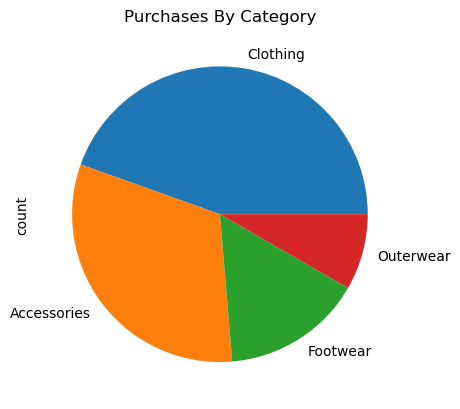

In [68]:
data["Category"].value_counts().plot(kind = "pie")
plt.title("Purchases By Category")
plt.show()

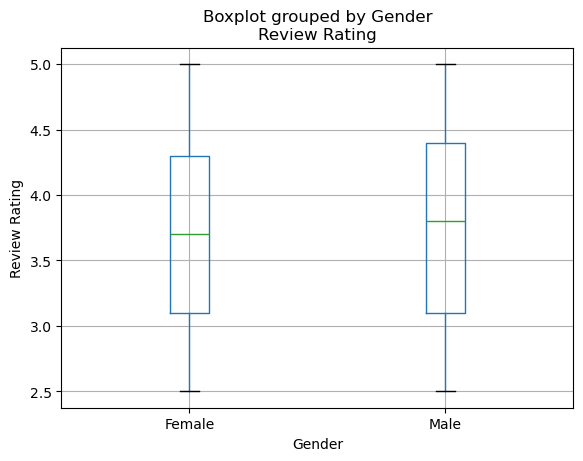

In [72]:
data.boxplot(column = "Review Rating", by = "Gender")
plt.ylabel("Review Rating")
plt.show()

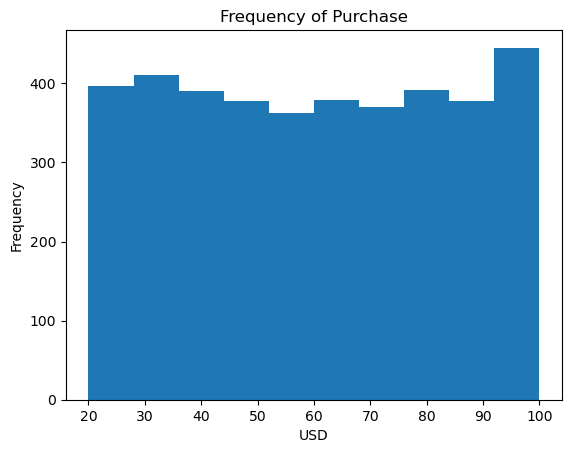

In [78]:
data["Purchase Amount (USD)"].plot(kind = "hist")
plt.xlabel("USD")
plt.ylabel("Frequency")
plt.title("Frequency of Purchase")
plt.show()

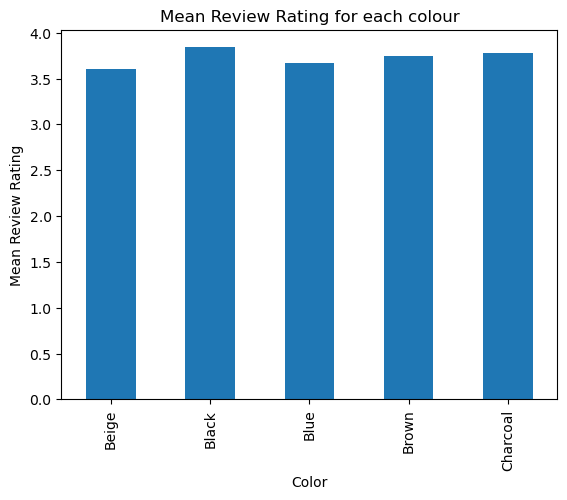

In [88]:
data.groupby("Color")["Review Rating"].mean().head().plot(kind = "bar")
plt.ylabel("Mean Review Rating")
plt.title("Mean Review Rating for each colour")
plt.show()

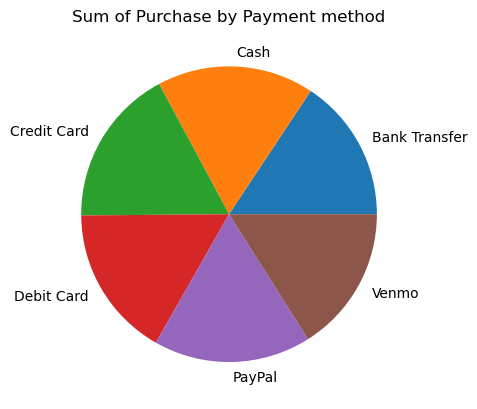

In [92]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum().plot(kind = "pie")
plt.ylabel(" ")
plt.title("Sum of Purchase by Payment method")
plt.show()

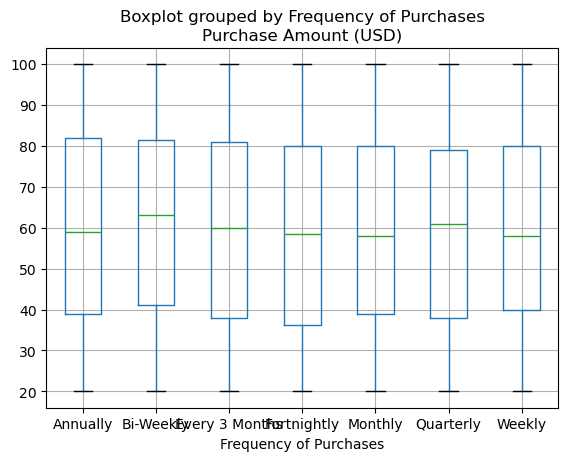

In [94]:
data.boxplot(column = "Purchase Amount (USD)", by = "Frequency of Purchases")
plt.show()

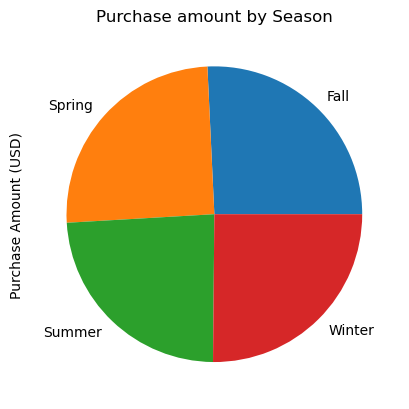

In [100]:
data.groupby("Season")["Purchase Amount (USD)"].sum().plot(kind = "pie")
plt.title("Purchase amount by Season")
plt.show()